In [1]:
import glob
import seaborn
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def unit_conv(ds, var='TSA'):
    if var in ['TSA','TSKIN','TREFHT','TSMX','TSMN']:
        ds=ds-273.15
    return ds

In [5]:
ds_temp = xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/'+
                           'COUP0000_PI_SOM'+
                           '/atm/hist/'+
                           'COUP0000_PI_SOM.cam.h1.0049-10.nc')
weights =ds_temp.gw/ds_temp.gw.mean(dim='lat')

ds_temp2 = xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/'+
                           'COUP0000_PI_SOM'+
                           '/lnd/hist/'+
                           'COUP0000_PI_SOM.clm2.h0.0049-02-01-00000.nc')

landarea=(ds_temp2.area*ds_temp2.landfrac)
landweights=landarea/landarea.mean(dim=['lat','lon'])

In [6]:
keys=['0001','0003','0004','0005',
      '0006','0007','0008','0009','0010',
      '0011','0012','0013','0014','0015',
      '0016','0017','0018','0019','0020',
      '0021','0022','0023','0024','0025',
     '0026','0027','0028','0029','0030',
     '0031','0032','0033','0034','0035',
     '0036']

In [22]:
keys_notplants=['0003','0004','0005',
      '0006','0007','0008','0009','0010',
      '0011','0012','0015',
      '0016','0017','0018','0035',
     '0036']

keys=['0001','0013','0014','0019','0020',
      '0021','0022','0023','0024','0025',
     '0026','0027','0028','0029','0030',
     '0031','0032','0033','0034']

# Land

In [ ]:
var='QRUNOFF'

In [1]:
from load_ensembles import *
ensemble_coupled=load_coupled_ensemble(var=var, domain='lnd')
ensemble_offline=load_offline_ensemble(var=var, domain='lnd')

1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680
1680


In [12]:
global_avg_offline=[]
for ds in ensemble_offline:
    avg_val = ((ds[var]*landweights).mean(dim=['lat','lon']))[40*12:]
    avg_val=avg_val.groupby('time.year').mean(dim='time')#.values
    avg_val=avg_val.mean(dim='year').values.item()
    global_avg_offline.append(avg_val)


In [13]:
global_avg_coupled=[]
for ds in ensemble_coupled:
    if np.size(ds[var].time)/12>100:
        avg_val = ((ds[var]*landweights).mean(dim=['lat','lon']))[40*12:]
        avg_val=avg_val.groupby('time.year').mean(dim='time')
        avg_val=avg_val.mean(dim='year').values.item()
        global_avg_coupled.append(avg_val)
    else:
        global_avg_coupled.append(None)

Text(0.5, 0, 'Ensemble number')

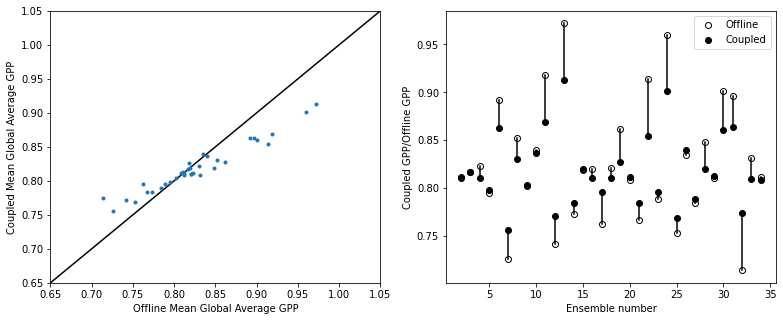

In [20]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
minval=0.65
maxval=1.05
plt.plot([minval, maxval],[minval, maxval],'-k')
plt.xlim([minval, maxval])
plt.ylim([minval, maxval])
plt.plot(global_avg_offline,global_avg_coupled,'.')
plt.xlabel('Offline Global Average GPP')
plt.ylabel('Coupled Global Average GPP')
plt.xlabel('Offline Mean Global Average GPP')
plt.ylabel('Coupled Mean Global Average GPP')
plt.subplot(1,2,2)
for i in np.arange(2,np.size(global_avg_coupled)):
    offline=global_avg_offline[i]
    coupled=global_avg_coupled[i]
    if i==2:
        plt.plot([i], [offline],'ok',fillstyle='none', label='Offline')
        plt.plot([i], [coupled],'ok', label='Coupled')
    else:
        plt.plot([i], [offline],'ok',fillstyle='none')
        plt.plot([i], [coupled],'ok')
    plt.plot([i,i],[offline, coupled], '-k')
plt.legend()
#plt.plot(,
#         np.array())#/np.array(global_avg_offline[2:]),'.')
plt.ylabel('Coupled GPP/Offline GPP')
plt.xlabel('Ensemble number')

In [21]:
for i, offline in enumerate(global_avg_offline):
    coupled = global_avg_coupled[i]
    diff = coupled-offline
    print(keys[i])
    print(diff)
    print('------------')

0001
0.008101495768642053
------------
0003
-0.008597567182732746
------------
0004
-0.0008258071029558778
------------
0005
0.00010653058416210115
------------
0006
-0.012605348514625803
------------
0007
0.0031055194849614054
------------
0008
-0.028928436746355146
------------
0009
0.030391013366170228
------------
0010
-0.021416453848360106
------------
0011
0.001878994284197688
------------
0012
-0.003255901554456986
------------
0013
-0.049111484113382176
------------
0014
0.029538716044044122
------------
0015
-0.05869783874368295
------------
0016
0.010999703023117036
------------
0017
0.00020346808014437556
------------
0018
-0.01013429299928248
------------
0019
0.03380318084964529
------------
0020
-0.010734916344517842
------------
0021
-0.03447474495624192
------------
0022
0.0027766033890657127
------------
0023
0.017175461776787415
------------
0024
-0.05884132251958363
------------
0025
0.007064624223858118
------------
0026
-0.05893703259062022
------------
0027
0.0155

<AxesSubplot:ylabel='Density'>

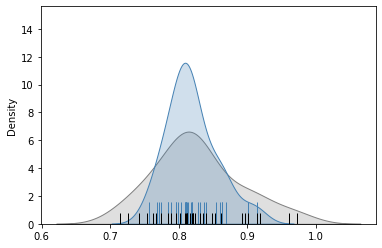

In [22]:
seaborn.kdeplot(global_avg_offline[2:], fill=True,color='grey')
seaborn.kdeplot(global_avg_coupled[2:], fill=True, color='steelblue')

seaborn.rugplot(global_avg_coupled[2:], height=0.1,color='steelblue')
seaborn.rugplot(global_avg_offline[2:], height=0.05,color='black')
#plt.plot([basecase_postspinup, basecase_postspinup],
#         [0,2.5],':k')
#plt.ylim([0,2.5])

In [23]:
paramkey = pd.read_csv('/glade/u/home/czarakas/coupled_PPE/code/set_up_ensemble/CLM5PPE_coupledPPE_crosswalk.csv')

In [24]:
global_avg_coupled_sorted=[]
global_avg_offline_sorted=[]
for i, coupledkey in enumerate(paramkey.key_coupledPPE):
    thiskey=coupledkey[4:]
    matches=[idx for idx, s in enumerate(keys) if thiskey in s]
    if np.size(matches)<1:
        print('missing '+thiskey)
        coupled=None
        offline=None
    elif np.size(matches)==1:
        key_index = matches[0]
        coupled=global_avg_coupled[key_index]
        offline=global_avg_offline[key_index]
    else:
        print('missing')
        coupled=None
        offline=None
    global_avg_coupled_sorted.append(coupled)
    global_avg_offline_sorted.append(offline)
paramkey['Coupled_GPP']=global_avg_coupled_sorted
paramkey['Offline_GPP']=global_avg_offline_sorted

missing 0000
missing 0002


d_max
fff
frac_sat_soil_dsl_init
jmaxb0
jmaxb1
kmax
lmrha
maximum_leaf_wetted_fraction
medlynintercept
medlynslope
nstem
rhosnir
sand_pf
tpu25ratio
upplim_destruct_metamorph
z0mr
zetamaxstable
zsno


(1.1, 2.5)

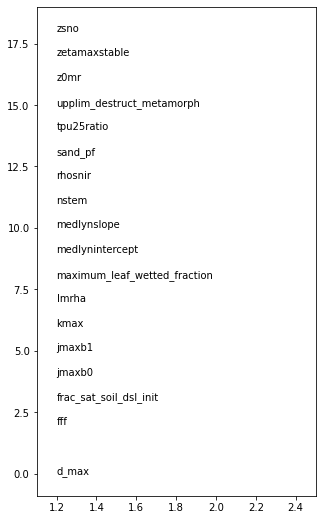

In [25]:
plt.figure(figsize=(5,9))
for i, param in enumerate(np.unique(paramkey.param)):
    if param not in ['default']:
        print(param)
        parammatches=paramkey[paramkey.param==param]
        plt.plot(parammatches.Coupled_GPP,[i,i], '-b',label='Coupled')
        plt.plot(parammatches.Offline_GPP,[i+0.1,i+0.1], '-k',label='Offline')
        plt.text(1.2,i,param)
plt.xlim([1.1,2.5])

d_max
fff
frac_sat_soil_dsl_init
jmaxb0
jmaxb1
kmax
lmrha
maximum_leaf_wetted_fraction
medlynintercept
medlynslope
nstem
rhosnir
sand_pf
tpu25ratio
upplim_destruct_metamorph
z0mr
zetamaxstable
zsno


Text(0, 0.5, 'Coupled GPP Sensitivity')

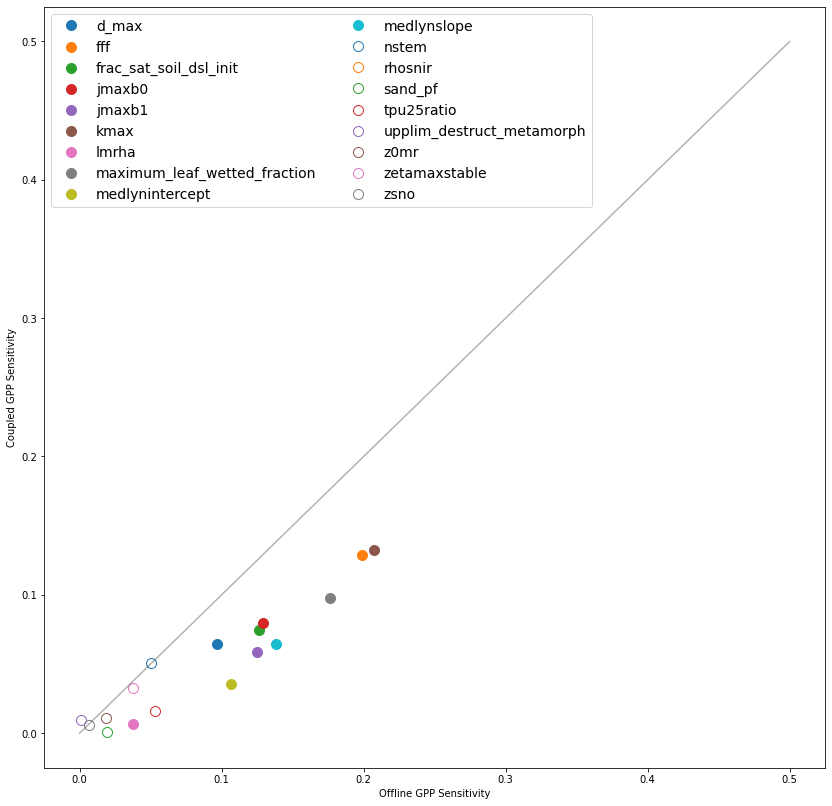

In [28]:
plt.figure(figsize=(14,14))
for i, param in enumerate(np.unique(paramkey.param)):
    if i>10:
        markerstyle='none'
    else:
        markerstyle='full'
    if param not in ['default']:
        print(param)
        parammatches=paramkey[paramkey.param==param]
        diff_coupled=parammatches.Coupled_GPP.values[0]-parammatches.Coupled_GPP.values[1]
        diff_offline=parammatches.Offline_GPP.values[0]-parammatches.Offline_GPP.values[1]
        plt.plot(np.abs(diff_offline),np.abs(diff_coupled), 'o',
                 fillstyle=markerstyle, markersize=10,label=param)
plt.legend(ncol=2, fontsize=14)
plt.plot([0,0.5],[0,0.5],'-k',alpha=0.3)
plt.xlabel('Offline GPP Sensitivity')
plt.ylabel('Coupled GPP Sensitivity')

d_max
fff
frac_sat_soil_dsl_init
jmaxb0
jmaxb1
kmax
lmrha
maximum_leaf_wetted_fraction
medlynintercept
medlynslope
nstem
rhosnir
sand_pf
tpu25ratio
upplim_destruct_metamorph
z0mr
zetamaxstable
zsno


(1.1, 2.5)

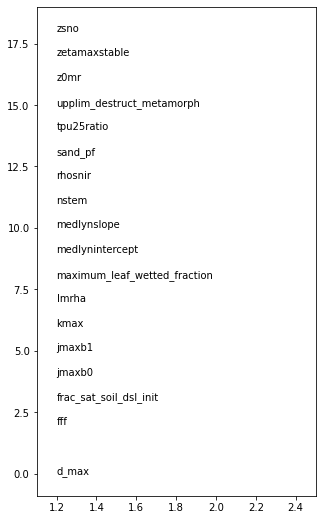

In [27]:
plt.figure(figsize=(5,9))
for i, param in enumerate(np.unique(paramkey.param)):
    if param not in ['default']:
        print(param)
        parammatches=paramkey[paramkey.param==param]
        plt.plot(parammatches.Coupled_GPP,[i,i], '-b',label='Coupled')
        plt.plot(parammatches.Offline_GPP,[i+0.1,i+0.1], '-k',label='Offline')
        plt.text(1.2,i,param)
plt.xlim([1.1,2.5])

# Old

In [30]:
labels=['rhosnir (min)',
        'maximum_leaf_wetted_fraction (min)',
        'maximum_leaf_wetted_fraction (max)',
        'medlynslope (max)',
        'medlynintercept (min)',
        'tpu25ratio(min)',
        'tpu25ratio(max)',
        'jmaxb0(max)',
        'jmaxb1 (min)',
        'jmaxb1 (max)',
     'kmax (min)','kmax(max)','nstem (min)','nstem (max)','lmrha (min)',
     'lmrha (max)','medlynslope (min)','jmaxb0 (min)','medlynintercept (max)']

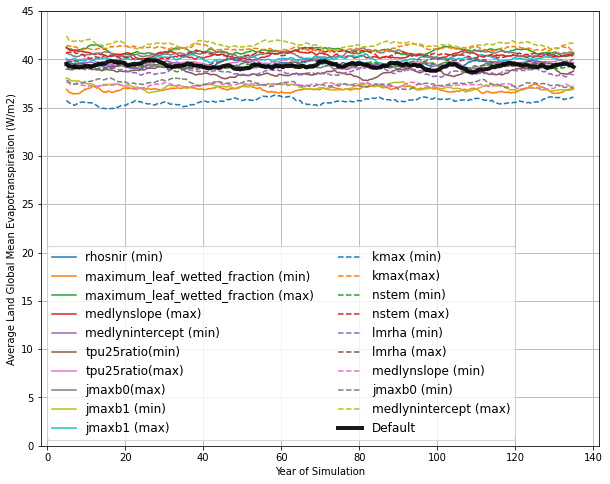

In [129]:
ensemble_lnd=ensemble_coupled

plt.figure(figsize=(10,8))
for i,key in enumerate(keys):
    if i>27:
        linestyle='dashdot'
    #elif i>19:
    #    linestyle='--'
    elif i>9:
        linestyle='--'
    else:
        linestyle='-'
    ds=ensemble_lnd[i]
    if ds is not None:
        years=np.arange(0,np.size(ds.time))/12
        plt.plot(years, 
                 unit_conv((ds[var]*landweights).mean(dim=['lat','lon']).rolling(time=12*5).mean(),var=var),
            label=labels[i], linestyle=linestyle)
        
#years=np.arange(0,np.size(basecase_lnd.time))/12
plt.plot(years,unit_conv((basecase_lnd[var]*landweights).mean(dim=['lat','lon']).rolling(time=12*5).mean()[0:np.size(years)],
                   var=var),
         '-k',linewidth=4,alpha=0.9,
        label='Default')
plt.legend(ncol=2,fontsize=12)

plt.ylim([0,45])
plt.xlabel('Year of Simulation')
plt.ylabel('Average Land Global Mean Evapotranspiration (W/m2)')
plt.grid()
plt.savefig('SpaghettiPlot_ET.png')

<xarray.DataArray ()>
array(39.32904, dtype=float32)


In [100]:
global_avg_coupled_sorted=[]
for i, coupledkey in enumerate(paramkey.key_coupledPPE):
    thiskey=coupledkey[4:]
    matches=[idx for idx, s in enumerate(keys) if thiskey in s]
    if np.size(matches)<1:
        print('missing '+thiskey)
        coupled=None
    elif np.size(matches)==1:
        key_index = matches[0]
        coupled=global_avg_coupled[key_index]
    else:
        print('missing')
        coupled=None
    global_avg_coupled_sorted.append(coupled)

paramkey['Coupled_GPP']=global_avg_coupled_sorted

missing 0000
missing 0002
missing 0007
missing 0008
missing 0009
missing 0010
missing 0015
missing 0016
missing 0017
missing 0018
missing 0035
missing 0036
missing 0003
missing 0004
missing 0005
missing 0006
missing 0011
missing 0012


In [101]:
paramlist=['tpu25ratio','lmrha','nstem','medlynintercept','jmaxb1','medlynslope','jmaxb0','maximum_leaf_wetted_fraction','kmax'] #'rhosnir',

In [120]:
defaultET=((basecase_lnd['EFLX_LH_TOT']*landweights).mean(dim=['lat','lon']).rolling(time=12).mean().mean(dim='time'))

In [122]:
print(defaultET.values)

39.32904


tpu25ratio
0.9600372314453125
lmrha
1.005950927734375
nstem
1.1362457275390625
medlynintercept
2.10302734375
jmaxb1
2.9421844482421875
medlynslope
3.0516586303710938
jmaxb0
3.150867462158203
maximum_leaf_wetted_fraction
3.9439315795898438
kmax
5.283000946044922


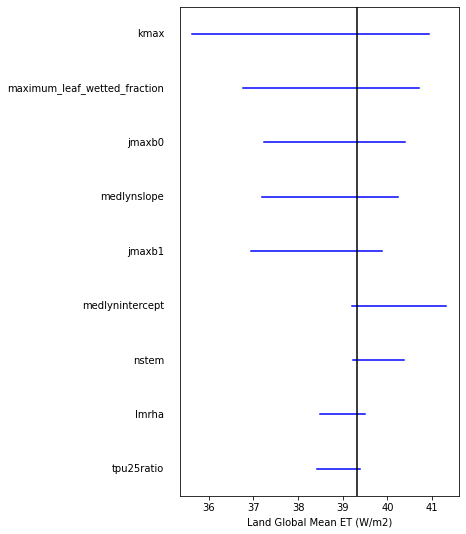

In [130]:
fig =plt.figure(figsize=(5,9))
frame1 = plt.gca()
for i, param in enumerate(paramlist):
    if param not in ['default']:
        print(param)
        parammatches=paramkey[paramkey.param==param]
        plt.plot(parammatches.Coupled_GPP,[i,i], '-b',label='Coupled')
        print(np.abs(parammatches.Coupled_GPP.values[0]-parammatches.Coupled_GPP.values[1]))
        plt.text(35,i,param, horizontalalignment='right',
                verticalalignment='center')
frame1.axes.get_yaxis().set_visible(False)
plt.plot([defaultET.values, defaultET.values],[-1,9],'-k')
plt.ylim([-0.5, 8.5])
#plt.xlim([1.1,2.5])
plt.xlabel('Land Global Mean ET (W/m2)')
plt.savefig('ParamExplanations.png')

In [115]:
defaultET

<AxesSubplot:ylabel='Density'>

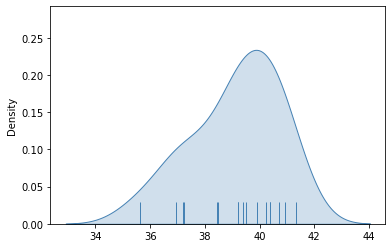

In [28]:
global_avg_coupled=[]
for ds in ensemble_coupled:
    if np.size(ds[var].time)/12>100:
        avg_val = ((ds[var]*landweights).mean(dim=['lat','lon']))[40*12:]
        avg_val=avg_val.groupby('time.year').mean(dim='time')
        avg_val=avg_val.mean(dim='year').values.item()
        global_avg_coupled.append(avg_val)
    else:
        global_avg_coupled.append(None)
#plt.plot([basecase_postspinup, basecase_postspinup],
#         [0,2.5],':k')
#plt.ylim([0,2.5])

<AxesSubplot:ylabel='Density'>

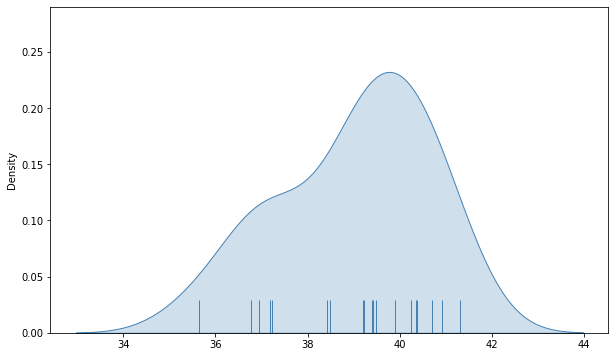

In [29]:
plt.figure(figsize=(10,6))
seaborn.kdeplot(global_avg_coupled, fill=True, color='steelblue')
seaborn.rugplot(global_avg_coupled, height=0.1,color='steelblue')
plt.xlabel('Global Mean 

In [18]:
# LEAF AREA OVER SUBSET
var='GPP'
latmin=-20
latmax=20
for i,key in enumerate(keys):
    if i>27:
        linestyle='dashdot'
    elif i>19:
        linestyle='--'
    elif i>9:
        linestyle=':'
    else:
        linestyle='-'
    ds=ensemble_lnd[i]
    if ds is not None:
        ds=ds.where(ds.lat>latmin).where(ds.lat<latmax)
        years=np.arange(0,np.size(ds.time))/12
        plt.plot(years, unit_conv((ds[var]*landweights).mean(dim=['lat','lon']).rolling(time=12).mean(),
                       var=var),
            label=key, linestyle=linestyle)
    else:
        print('no '+key)
years=np.arange(0,np.size(basecase_lnd.time))/12
plt.plot(years,unit_conv((basecase_lnd[var].where(basecase_lnd.lat>latmin).where(basecase_lnd.lat<latmax)
                          *landweights).mean(dim=['lat','lon']).rolling(time=12).mean(),
                   var=var),
         '-k',linewidth=4,alpha=0.9)
plt.legend(ncol=3,fontsize=6)
plt.grid()

NameError: name 'ensemble_lnd' is not defined

In [33]:
var='TLAI'
global_mean_LAI = []
basecase_postspinup = ((basecase_lnd[var]*landweights).mean(dim=['lat','lon'])[40*12:]).mean(dim='time').values
for i,key in enumerate(keys):
    ds=ensemble_lnd[i]
    if ds is not None:
        ds_post_spinup = ((ds[var]*landweights).mean(dim=['lat','lon']))[40*12:]
        ds_post_spinup = ds_post_spinup.mean(dim='time').values
        print(ds_post_spinup)
        if np.size(ds_post_spinup)==1:
            global_mean_LAI.append(float(ds_post_spinup))

KeyError: 'TLAI'

(0.0, 2.5)

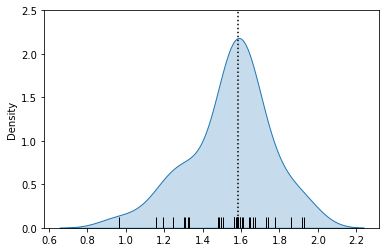

In [9]:

seaborn.kdeplot(global_mean_LAI, fill=True)
seaborn.rugplot(global_mean_LAI, height=0.05,color='black')
plt.plot([basecase_postspinup, basecase_postspinup],
         [0,2.5],':k')
plt.ylim([0,2.5])

In [ ]:
plt.figure(figsize=(10,7))
for i,key in enumerate(keys):
    ds=ensemble_lnd[i]
    plt.subplot(6,6,i+1)
    plt.title(key)
    
    if ds is not None:
        annual_mean=(ds[var]*landweights).mean(dim=['lat','lon']).rolling(time=12).mean()
        
        plt.plot((basecase_lnd[var]*landweights).mean(dim=['lat','lon']).rolling(time=12).mean(),
            '-k',alpha=0.5,label='baseline')
        plt.plot(annual_mean,
            '-',label=key)
    
        
    if ((np.nanmin(annual_mean)>1.3)&(np.nanmax(annual_mean)<1.7)):
        plt.ylim([1.3, 1.7])
    plt.grid()
plt.tight_layout()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-359408ef8155>", line 16, in <module>
    if ((np.nanmin(annual_mean)>1.3)&(np.nanmax(annual_mean)<1.7)):
  File "<__array_function__ internals>", line 6, in nanmin
  File "/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py", line 327, in nanmin
    a, mask = _replace_nan(a, +np.inf)
  File "/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py", line 98, in _replace_nan
    a = np.asanyarray(a)
  File "/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py", line 138, in asanyarray
    return array(a, dtype, copy=False, order=order, subok=True)
  File "/glade/u/ssg/ch/usr/jupyterhub/en

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-359408ef8155>", line 16, in <module>
    if ((np.nanmin(annual_mean)>1.3)&(np.nanmax(annual_mean)<1.7)):
  File "<__array_function__ internals>", line 6, in nanmin
  File "/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py", line 327, in nanmin
    a, mask = _replace_nan(a, +np.inf)
  File "/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py", line 98, in _replace_nan
    a = np.asanyarray(a)
  File "/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py", line 138, in asanyarray
    return array(a, dtype, copy=False, order=order, subok=True)
  File "/glade/u/ssg/ch/usr/jupyterhub/en

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



# Atmosphere

In [25]:
var='TREFHT'
ensemble_atm = []
basecase=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/COUP0000_PI_SOM/atm/proc/tseries/COUP0000_PI_SOM.cam.h1.timeseries.'+var+'.nc')
for key in keys:
    #print(key)
    fpath=('/glade/campaign/cgd/tss/czarakas/COUP'+
                           key+'_PI_SOM_v02/atm/proc/tseries/'+
                           'COUP'+key+'_PI_SOM_v02.cam.h1.timeseries.'+var+'.nc')
    if np.size(glob.glob(fpath))>0:
        ds = xr.open_mfdataset(fpath)
    else:
        print("no "+fpath)
        ds = None
    ensemble_atm.append(ds)

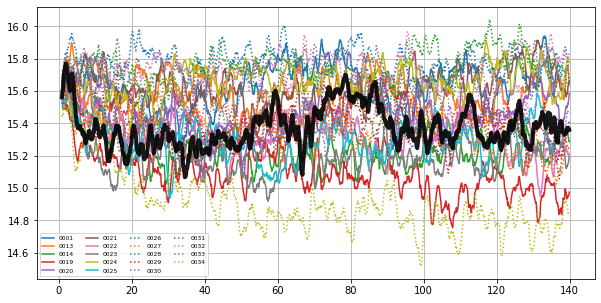

In [26]:
plt.figure(figsize=(10,5))
for i,key in enumerate(keys):
    if i>27:
        linestyle='dashdot'
    elif i>19:
        linestyle='--'
    elif i>9:
        linestyle=':'
    else:
        linestyle='-'
    ds=ensemble_atm[i]
    if ds is not None:
        years=np.arange(0,np.size(ds.time))/12
        plt.plot(years,(ds['TREFHT']*weights).mean(dim=['lat','lon']).rolling(time=12).mean()-273.15,
             linestyle=linestyle,
            label=key)
years=np.arange(0,np.size(basecase.time))/12
plt.plot(years,(basecase['TREFHT']*weights).mean(dim=['lat','lon']).rolling(time=12).mean()-273.15,
         '-k',linewidth=4,alpha=0.9)
plt.legend(ncol=4,fontsize=6)
plt.grid()

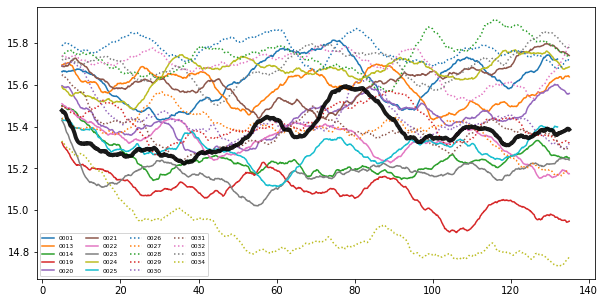

In [27]:
plt.figure(figsize=(10,5))
for i,key in enumerate(keys):
    if i>27:
        linestyle='dashdot'
    elif i>19:
        linestyle='--'
    elif i>9:
        linestyle=':'
    else:
        linestyle='-'
    ds=ensemble_atm[i]
    if ds is not None:
        years=np.arange(0,np.size(ds.time))/12
        plt.plot(years,(ds['TREFHT']*weights).mean(dim=['lat','lon']).load().rolling(time=120,center=True).mean()-273.15,
             linestyle=linestyle,
            label=key)
    else:
        print('not including '+key)
years=np.arange(0,np.size(basecase.time))/12
plt.plot(years,(basecase['TREFHT']*weights).mean(dim=['lat','lon']).load().rolling(time=120,center=True).mean()-273.15,
         '-k',linewidth=4,alpha=0.9)
plt.legend(ncol=4,fontsize=6)


In [28]:
defTemperature=(basecase['TREFHT']*weights).mean(dim=['lat','lon']).load().mean()
defTemperature=defTemperature.values-273.15

In [29]:
defTemperature

15.373991616291846

In [30]:
global_atm_coupled=[]
for ds in ensemble_atm:
    if np.size(ds[var].time)/12>100:
        avg_val = ((ds[var]*landweights).mean(dim=['lat','lon']))[40*12:]
        avg_val=avg_val.groupby('time.year').mean(dim='time')-273.15
        avg_val=avg_val.mean(dim='year').values.item()
        global_atm_coupled.append(avg_val)
    else:
        global_atm_coupled.append(None)

In [31]:
global_atm_coupled

[-40.54670715332031,
 -40.586368560791016,
 -41.087242126464844,
 -41.33041763305664,
 -40.78673553466797,
 -40.54214096069336,
 -40.97215270996094,
 -41.15943908691406,
 -40.436866760253906,
 -41.04866409301758,
 -40.34321594238281,
 -40.944210052490234,
 -40.45378112792969,
 -40.86461639404297,
 -40.77338790893555,
 -40.886451721191406,
 -40.44140625,
 -40.462833404541016,
 -41.64194107055664]

Text(0.5, 0, 'Global Mean Surface Temperature')

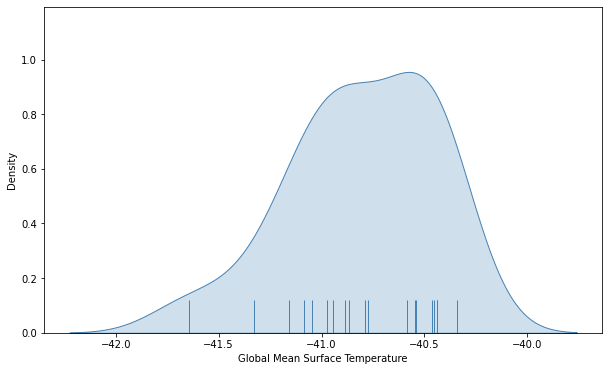

In [24]:
plt.figure(figsize=(10,6))
seaborn.kdeplot(global_atm_coupled, fill=True, color='steelblue')
seaborn.rugplot(global_atm_coupled, height=0.1,color='steelblue')
plt.xlabel('Global Mean Surface Temperature')

In [16]:
global_atm_coupled

[15.648924647984684,
 15.558114518206171,
 15.212088643397408,
 15.043081503290388,
 15.443040601626013,
 15.601165675031988,
 15.29222882477909,
 15.159899445550971,
 15.67668990988071,
 15.270290558117889,
 15.748664694887994,
 15.339047383888992,
 15.745240403661052,
 15.3989241194588,
 15.404805014166941,
 15.347018997724483,
 15.675589087320652,
 15.68800637513269,
 14.807469701091184]

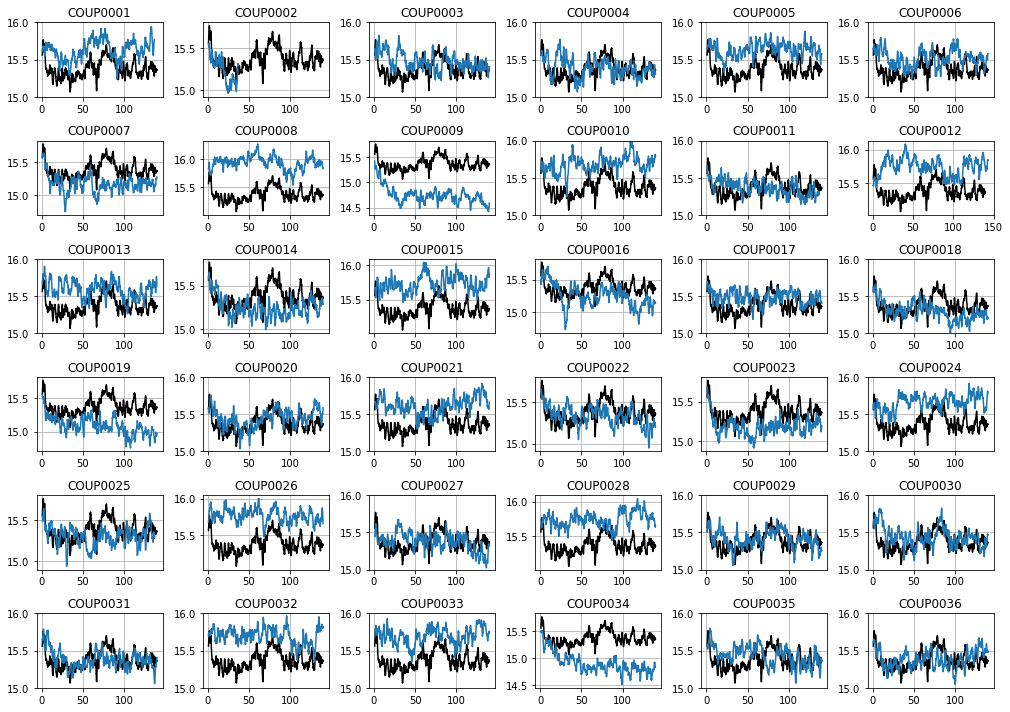

In [149]:
plt.figure(figsize=(14,10))
var='TREFHT'
basecase_annual_mean=(basecase[var]*weights).mean(dim=['lat','lon']).rolling(time=12).mean()-273.15
years_basecase=np.arange(0,np.size(basecase.time))/12
for i,key in enumerate(keys):
    ds=ensemble_atm[i]
    plt.subplot(6,6,i+1)
    plt.title(key)
    plt.plot(years_basecase, basecase_annual_mean,
            '-k',label='key')
    if ds is not None:
        annual_mean=(ds[var]*weights).mean(dim=['lat','lon']).rolling(time=12).mean()-273.15
        years=np.arange(0,np.size(annual_mean.time))/12
        plt.plot(years,annual_mean,
                '-',label='key')
    if ((np.nanmin(annual_mean)>15)&(np.nanmax(annual_mean)<16)):
        plt.ylim([15, 16])
    plt.grid()
plt.tight_layout()
#plt.plot((ds01['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))

In [150]:
plt.figure(figsize=(14,10))
yr_spin_up_done=0
var='TREFHT'
basecase_annual_mean=(basecase[var]*weights).mean(dim=['lat','lon'])-273.15
basecase_annual_avg=basecase_annual_mean[(yr_spin_up_done*12):(37*12)].mean(dim=['time']).values
for i,key in enumerate(keys):
    ds=ensemble_atm[i]
    print(key)
    annual_mean=(ds[var]*weights).mean(dim=['lat','lon'])-273.15
    print(annual_mean[(yr_spin_up_done*12):(37*12)].mean(dim=['time']).values-basecase_annual_avg)
#plt.plot((ds01['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))

COUP0001
0.22503875528583173
COUP0002
-0.08365892602605385
COUP0003
0.25801278855874443
COUP0004
0.15122980154780485
COUP0005
0.2619223594713205
COUP0006
0.21629722773178806
COUP0007
-0.12315043014601734
COUP0008
0.5939866292950278
COUP0009
-0.45356024763750824
COUP0010
0.2797913638849092
COUP0011
0.12453895123375247
COUP0012
0.4016167372840993
COUP0013
0.31273303589248513
COUP0014
-0.004371795401187484
COUP0015
0.3581520379493792
COUP0016
0.021749393859584742
COUP0017
0.18849738322328946
COUP0018
0.04863561099432623
COUP0019
-0.13941271895425267
COUP0020
0.12573982304525622
COUP0021
0.30202629543734183
COUP0022
0.09204852132234898
COUP0023
-0.08715058585669233
COUP0024
0.25291631957499483
COUP0025
0.021114641735117345
COUP0026
0.45700082317418733
COUP0027
0.11762638349457966
COUP0028
0.36112990853975546
COUP0029
0.1008987020223433
COUP0030
0.20256666548662317
COUP0031
0.12169240339621368
COUP0032
0.39536427323390555
COUP0033
0.3669289608184503
COUP0034
-0.20388091771199868
COUP0035
0.

<Figure size 1008x720 with 0 Axes>

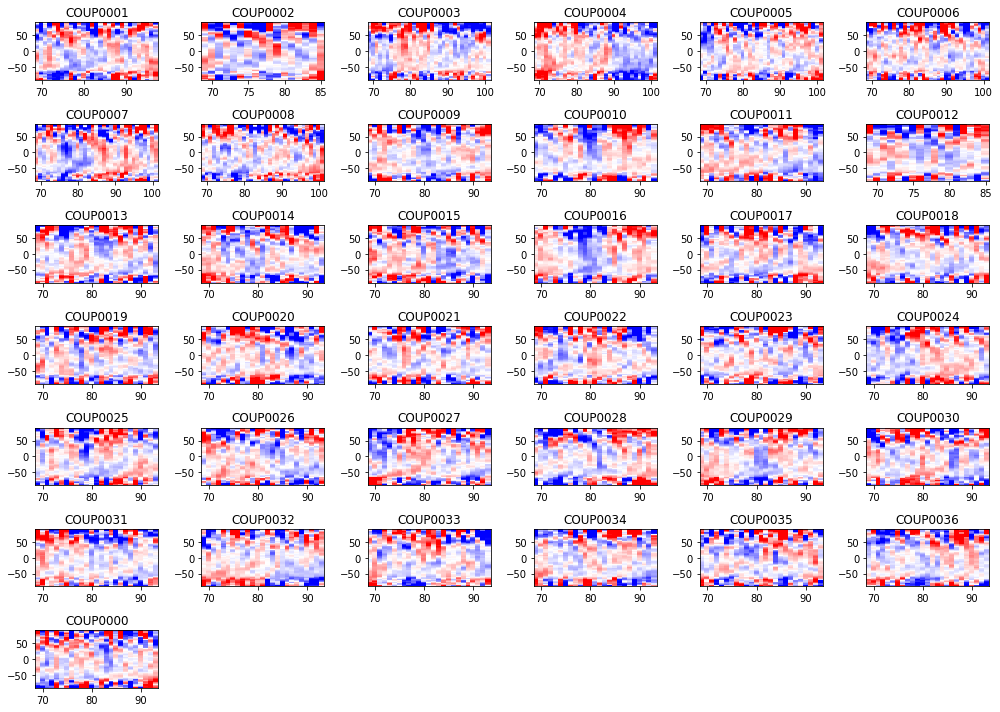

In [13]:
var = 'TREFHT'
yr_spin_up_done=20

plt.figure(figsize=(14,10))
for i,key in enumerate(keys):
    ds=ensemble_atm[i]
    plt.subplot(7,6,i+1)
    plt.title(key)
    var_series = ds[var]-273.15
    var_zonal_mean = var_series.mean(dim='lon')
    var_zonal_mean = var_zonal_mean.groupby('time.year').mean(dim='time')
    var_zonal_mean=var_zonal_mean[yr_spin_up_done:,:]
    var_zonal_mean = var_zonal_mean - var_zonal_mean.mean(dim='year')
    cbound = np.max(np.abs([np.nanpercentile(var_zonal_mean,95),np.nanpercentile(var_zonal_mean,5)]))
    plt.pcolor(var_zonal_mean.year, var_zonal_mean.lat, var_zonal_mean.transpose(), cmap=plt.cm.bwr,
          vmin=-cbound, vmax=cbound, shading='auto')
    #, tlai_zonal_mean.time, tlai_zonal_mean.lat)

ds=basecase
plt.subplot(7,6,i+2)
plt.title('COUP0000')
var_series = ds[var]-273.15
var_zonal_mean = var_series.mean(dim='lon')
var_zonal_mean = var_zonal_mean.groupby('time.year').mean(dim='time')
var_zonal_mean=var_zonal_mean[yr_spin_up_done:,:]
var_zonal_mean = var_zonal_mean - var_zonal_mean.mean(dim='year')
cbound = np.max(np.abs([np.nanpercentile(var_zonal_mean,95),np.nanpercentile(var_zonal_mean,5)]))
plt.pcolor(var_zonal_mean.year, var_zonal_mean.lat, var_zonal_mean.transpose(), cmap=plt.cm.bwr,
      vmin=-cbound, vmax=cbound, shading='auto')
plt.tight_layout()
#plt.plot((ds01['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))

In [ ]:
plt.figure(figsize=(14,10))
yr_spin_up_done=15
var='TREFHT'
basecase_annual_mean=(basecase[var])[(yr_spin_up_done*12):(45*12):,:,:].mean(dim=['time'])-273.15
for i,key in enumerate(keys):
    ds=ensemble_atm[i]
    plt.subplot(6,6,i+1)
    plt.title(key)
    annual_mean=(ds[var])[(yr_spin_up_done*12):(45*12):,:,:].mean(dim=['time'])-273.15
    plt.pcolormesh(annual_mean-basecase_annual_mean, vmin=-2, vmax=2, cmap=plt.cm.bwr)
    plt.grid()
plt.tight_layout()
#plt.plot((ds01['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))

# Compare

In [116]:
import datetime
test=xr.open_mfdataset('/glade/scratch/czarakas/archive/PPE_old/COUP0000_PI_SOM_v02/atm/hist/*.cam.h1.*.nc')


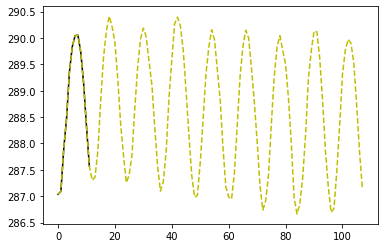

In [124]:
plt.plot((test['TREFHT']*weights).mean(dim=['lat','lon']),'k',label='PPEn08')
plt.plot((basecase['TREFHT']*weights).mean(dim=['lat','lon']),'--y',label='PPEn08')

In [131]:
basecase['TREFHT']*weights

<xarray.DataArray (time: 156, lat: 96, lon: 144)>
array([[[ 1.61683549,  1.61600931,  1.61585503, ...,  1.61710871,
          1.61708839,  1.6170136 ],
        [12.98688953, 12.97383837, 12.96925308, ..., 13.00018413,
         12.99720922, 12.99328859],
        [25.99392411, 25.96644825, 25.95597333, ..., 26.07402586,
         26.05944037, 26.03641124],
        ...,
        [25.24824082, 25.23612039, 25.23094536, ..., 25.26647109,
         25.25995467, 25.25594014],
        [12.57128231, 12.56891039, 12.56640954, ..., 12.57370307,
         12.57345403, 12.57278378],
        [ 1.56651257,  1.56640184,  1.56627829, ...,  1.56680942,
          1.56671281,  1.56661059]],

       [[ 1.55184152,  1.55101034,  1.55085485, ...,  1.55211715,
          1.55209662,  1.55202133],
        [12.51383573, 12.49819964, 12.49128007, ..., 12.53186536,
         12.52721762, 12.52184756],
        [25.16787975, 25.144817  , 25.1269613 , ..., 25.23633809,
         25.22154931, 25.20433228],
...
        [26.50570809, 26.50348313, 26.49879951, ..., 26.47730383,
         26.49606393, 26.50437471],
        [13.2424058 , 13.24099162, 13.2392315 , ..., 13.23997062,
         13.24157379, 13.24259479],
        [ 1.64957581,  1.64936577,  1.64913539, ...,  1.64989079,
          1.64983432,  1.64973761]],

       [[ 1.61121454,  1.61040078,  1.6102486 , ...,  1.61148666,
          1.61146624,  1.61139105],
        [12.94475072, 12.92998348, 12.92312077, ..., 12.963445  ,
         12.95794843, 12.95306125],
        [25.94501661, 25.91028162, 25.89253797, ..., 26.04202966,
         26.02498551, 25.99379445],
        ...,
        [25.85886264, 25.85563085, 25.85542596, ..., 25.85329064,
         25.85249029, 25.85665849],
        [12.85331571, 12.84753325, 12.84067455, ..., 12.86236776,
         12.86006791, 12.85724916],
        [ 1.59878704,  1.59825892,  1.59762437, ...,  1.59996504,
          1.59962494,  1.59923828]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0049-01-16 12:00:00 ... 0057-12-16 12:00:00

In [125]:
test2=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_SOM_v02/atm/proc/tseries/*TREFHT*.nc')

In [128]:
test3=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_PI_SOM/atm/hist/*.cam.h1.*.nc')

In [141]:
import numpy as np

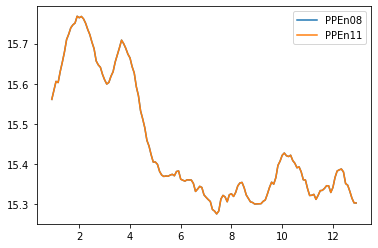

In [142]:
plt.plot(np.arange(0,156)/12,(test3['TREFHT']*weights).mean(dim=['lat','lon']).load().rolling(time=12).mean()-273.15,label='PPEn08')
plt.plot(np.arange(0,156)/12,(basecase['TREFHT']*weights).mean(dim=['lat','lon']).load().rolling(time=12).mean()-273.15,label='PPEn11')
plt.legend()